In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os

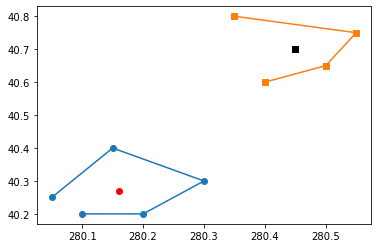

In [2]:
# define two unstructured grids (i.e, two basins)

lat_corner1 = [40.2, 40.2, 40.3, 40.4, 40.25]
lon_corner1 = [280.1, 280.2, 280.3, 280.15, 280.05]

lon_cen1 = np.mean(lon_corner1)
lat_cen1 = np.mean(lat_corner1)


lat_corner2 = [40.6, 40.65, 40.75, 40.8]
lon_corner2 = [280.4, 280.5, 280.55, 280.35]

lon_cen2 = np.mean(lon_corner2)
lat_cen2 = np.mean(lat_corner2)


plt.plot(lon_corner1, lat_corner1, '-o')
plt.plot(lon_cen1, lat_cen1, 'ro')

plt.plot(lon_corner2, lat_corner2, '-s')
plt.plot(lon_cen2, lat_cen2, 'ks')

In [3]:
# convert to SCRIP unstructured grid
# https://earthsystemmodeling.org/docs/release/ESMF_8_0_1/ESMF_refdoc/node3.html#SECTION03028100000000000000
# Here is a sample header from a SCRIP unstructured grid file:

# netcdf ne4np4-pentagons {
# dimensions:
#       grid_size = 866 ;
#       grid_corners = 5 ;
#       grid_rank = 1 ;
# variables:
#       int grid_dims(grid_rank) ;
#       double grid_center_lat(grid_size) ;
#          grid_center_lat:units = "degrees" ;
#       double grid_center_lon(grid_size) ;
#          grid_center_lon:units = "degrees" ;
#       double grid_corner_lon(grid_size, grid_corners) ;
#          grid_corner_lon:units = "degrees";
#          grid_corner_lon:_FillValue = -9999. ;
#       double grid_corner_lat(grid_size, grid_corners) ;
#          grid_corner_lat:units = "degrees" ;
#          grid_corner_lat:_FillValue = -9999. ;
#       int grid_imask(grid_size) ;
#          grid_imask:_FillValue = -9999. ;
#       double grid_area(grid_size) ;
#          grid_area:units = "radians^2" ;
#          grid_area:long_name = "area weights" ;
# }
# The variables are the same as described above, however, here grid_rank = 1. In this format there is no notion of which cells are next to which, so to construct the unstructured mesh the connection between cells is defined by searching for cells with the same corner coordinates. (e.g. the same grid_corner_lat and grid_corner_lon values).


lat_cen = np.array([lat_cen1, lat_cen2], dtype=np.float64)
lon_cen = np.array([lon_cen1, lon_cen2], dtype=np.float64)
grid_imask = np.array([1, 1], dtype=np.int64)
grid_area = np.array([0.04, 0.03], dtype=np.float64) # random number

lat_corner = -9999.0 * np.ones([2, 5], dtype=np.float64)
lat_corner[0, :5]=lat_corner1
lat_corner[1, :4]=lat_corner2

lon_corner = -9999.0 * np.ones([2, 5], dtype=np.float64)
lon_corner[0, :5]=lon_corner1
lon_corner[1, :4]=lon_corner2

ds = xr.Dataset()
# grid_rank = 1
# grid_size = 2
# grid_corners = 5

ds['grid_dims'] = xr.DataArray(np.array([1], dtype=np.int64), dims=('grid_rank'))

ds['grid_center_lat'] = xr.DataArray(lat_cen, dims=('grid_size'))
ds['grid_center_lat'].attrs['units'] = "degrees"

ds['grid_center_lon'] = xr.DataArray(lon_cen, dims=('grid_size'))
ds['grid_center_lon'].attrs['units'] = "degrees"

ds['grid_corner_lat'] = xr.DataArray(lat_corner, dims=('grid_size', 'grid_corners'))
ds['grid_corner_lat'].attrs['units'] = "degrees"
ds['grid_corner_lat'].attrs['_FillValue'] = -9999.

ds['grid_corner_lon'] = xr.DataArray(lon_corner, dims=('grid_size', 'grid_corners'))
ds['grid_corner_lon'].attrs['units'] = "degrees"
ds['grid_corner_lon'].attrs['_FillValue'] = -9999.

ds['grid_imask'] = xr.DataArray(grid_imask, dims=('grid_size'))
ds['grid_imask'].attrs['_FillValue'] = -9999.

ds['grid_area'] = xr.DataArray(grid_area, dims=('grid_size'))
ds['grid_area'].attrs['units'] = "radians^2"
ds['grid_area'].attrs['long_name'] = "area weights"

ds.to_netcdf('test_basins_SCRIPunstructured.nc', format='NETCDF3_CLASSIC')

In [4]:
ds

<xarray.Dataset>
Dimensions:          (grid_rank: 1, grid_size: 2, grid_corners: 5)
Dimensions without coordinates: grid_rank, grid_size, grid_corners
Data variables:
    grid_dims        (grid_rank) int64 1
    grid_center_lat  (grid_size) float64 40.27 40.7
    grid_center_lon  (grid_size) float64 280.2 280.5
    grid_corner_lat  (grid_size, grid_corners) float64 40.2 40.2 ... -9.999e+03
    grid_corner_lon  (grid_size, grid_corners) float64 280.1 ... -9.999e+03
    grid_imask       (grid_size) int64 1 1
    grid_area        (grid_size) float64 0.04 0.03